In [1]:
# Data Handling
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import math
import datasist as ds 

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import randint

# Feature Processing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

# Other Packages
import random
import pickle
import warnings

warnings.filterwarnings("ignore")

c:\Users\kobby\anaconda3\Lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if len(date_cols) is not 0:


In [2]:
df = pd.read_csv('bank-full.csv')

# Display the dataframe
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# read excel file and use the datasist for the basic EDA
ds.structdata.describe(df)

First five data points


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no




Random five data points


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10350,54,blue-collar,married,primary,no,1087,yes,no,unknown,12,jun,77,1,-1,0,unknown,no
7900,51,blue-collar,divorced,secondary,no,1069,yes,no,unknown,30,may,247,2,-1,0,unknown,no
36624,29,management,married,tertiary,no,20,yes,no,cellular,12,may,418,1,-1,0,unknown,no
35538,45,technician,married,secondary,no,1240,no,no,cellular,7,may,269,2,-1,0,unknown,no
24735,50,technician,married,secondary,no,0,yes,yes,cellular,18,nov,126,2,-1,0,unknown,no




Last five data points


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no




Shape of  data set: (45211, 17)


Size of  data set: 768587


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64




Numerical Features in Data set
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Categorical Features in Data set


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']



Statistical Description of Columns


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000




Description of Categorical Features


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922




Unique class Count of Categorical features


,Feature,Unique Count
0,job,12
1,marital,3
2,education,4
3,default,2
4,housing,2
5,loan,2
6,contact,3
7,month,12
8,poutcome,4
9,y,2




Missing Values in Data


,features,missing_counts,missing_percent
0,age,0,0.0
1,job,0,0.0
2,marital,0,0.0
3,education,0,0.0
4,default,0,0.0
5,balance,0,0.0
6,housing,0,0.0
7,loan,0,0.0
8,contact,0,0.0
9,day,0,0.0


EDA

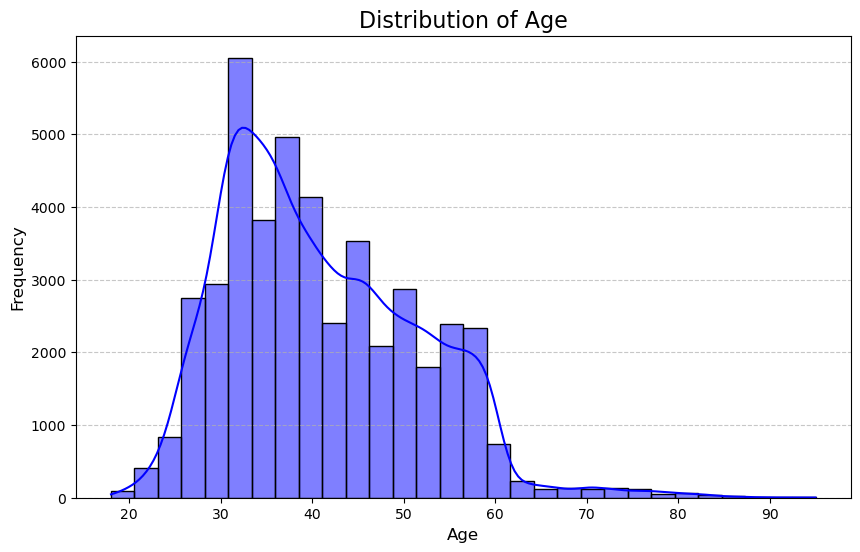

In [6]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis for 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This histogram represents the **distribution of age** within a dataset. Here are the observations and insights:

1. **Shape of the Distribution**:
   - The distribution appears to be **right-skewed** (positively skewed), meaning there are more individuals in the lower age ranges, and the frequency diminishes as the age increases.
   - The peak (mode) of the distribution is centered around ages **30-35**.

2. **Density Overlay**:
   - A kernel density estimate (KDE) is overlaid, showing a smooth representation of the age distribution.
   - This further confirms the right-skewness of the data.

3. **Range**:
   - The age range appears to span from around **20** to approximately **90**, with most data concentrated between **20 and 60**.

4. **Frequency Peaks**:
   - The highest frequency is observed around **30-35 years**.
   - Frequencies drop significantly after age **50**, indicating fewer individuals in older age groups.

5. **Potential Insights**:
   - If this data pertains to a population (e.g., workforce, customers, or patients), the majority are younger or middle-aged individuals.
   - The skewness indicates a relatively small proportion of older individuals in the dataset.


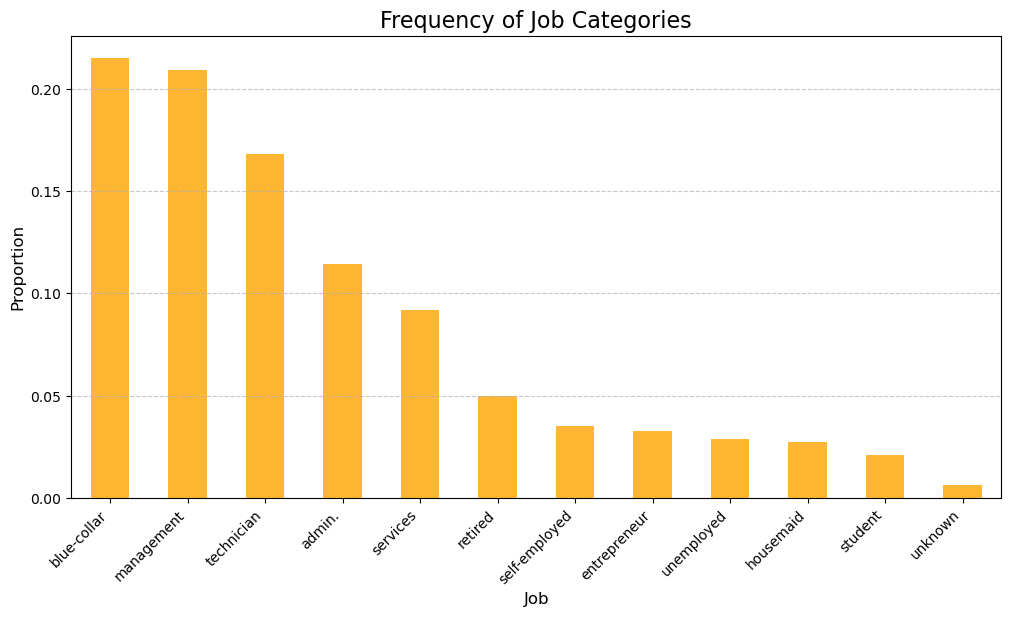

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [7]:
# Univariate analysis for 'job'
plt.figure(figsize=(12, 6))
df['job'].value_counts(normalize=True).plot(kind='bar', color='orange', alpha=0.8)
plt.title('Frequency of Job Categories', fontsize=16)
plt.xlabel('Job', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Value counts for 'default'
print(df['job'].value_counts())

This bar chart represents the **frequency of job categories** in a dataset. Here are the observations and insights:

1. **Job Categories and Proportions**:
   - The x-axis displays different job categories (e.g., blue-collar, management, technician), while the y-axis shows the proportion of individuals in each category.
   - The job categories are sorted by frequency in descending order.

2. **Most Common Categories**:
   - **Blue-collar** and **management** are the most frequent job categories, each accounting for approximately **20% of the dataset**.
   - These two categories dominate the distribution, suggesting they make up a significant portion of the population.

3. **Moderately Represented Categories**:
   - Jobs like **technician**, **admin.**, and **services** follow, with proportions ranging between **10-15%**.
   - These categories represent a smaller but notable fraction of the dataset.

4. **Least Common Categories**:
   - Job categories such as **student**, **unknown**, and **housemaid** are the least represented, with proportions below **5%**.
   - The "unknown" category might indicate missing or unclassified data and could be a candidate for further exploration.

5. **Potential Insights**:
   - This distribution might reflect the socio-economic structure of the dataset, showing dominance in certain employment types like manual labor (blue-collar) or administrative roles (management).
   - The presence of an "unknown" category could require cleaning or imputation if it affects analysis.



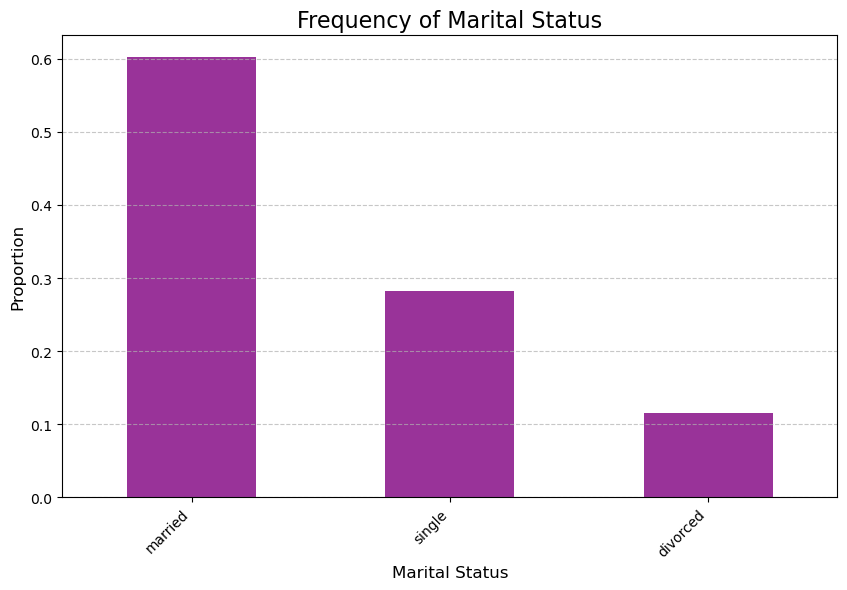

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [8]:
# Univariate analysis for 'marital'
plt.figure(figsize=(10, 6))
df['marital'].value_counts(normalize=True).plot(kind='bar', color='purple', alpha=0.8)
plt.title('Frequency of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Value counts for 'default'
print(df['marital'].value_counts())


The chart shows that the majority of individuals in the dataset are **married** (around 60%), followed by a significant portion who are **single** (about 30%), while only a small fraction are **divorced** (around 10%). This highlights that marital status is heavily skewed toward married individuals, which could influence any analysis or model relying on this variable, especially in contexts like economic behavior or health outcomes.

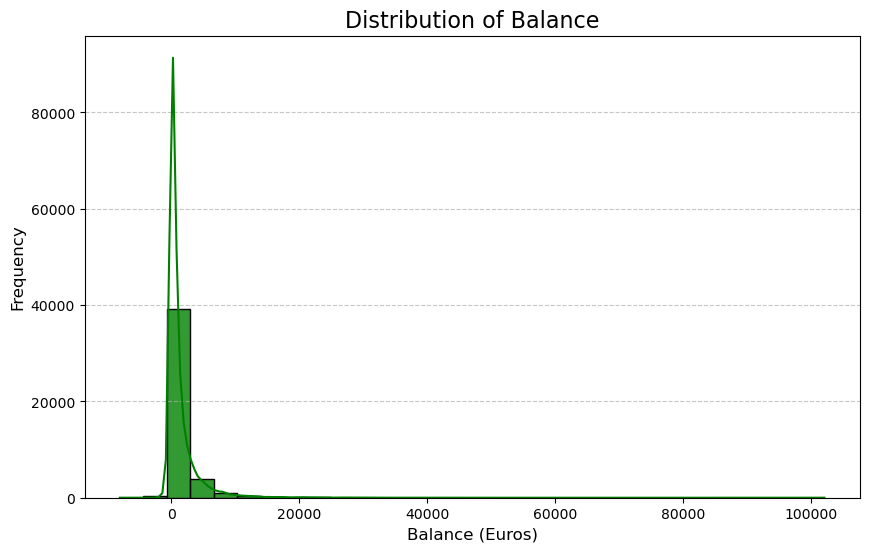

In [9]:
# Univariate analysis for 'balance'
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'], kde=True, bins=30, color='green', alpha=0.8)
plt.title('Distribution of Balance', fontsize=16)
plt.xlabel('Balance (Euros)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The distribution of balances is highly **right-skewed**, with the majority of individuals having balances close to **0 Euros**. A few individuals have very high balances, creating a long tail in the distribution. This suggests that most of the dataset is concentrated in lower balance ranges, while high balances are rare and could represent outliers or a small, affluent subset. This skewness might require transformation or specialized handling in predictive models to ensure balance data does not disproportionately influence results.

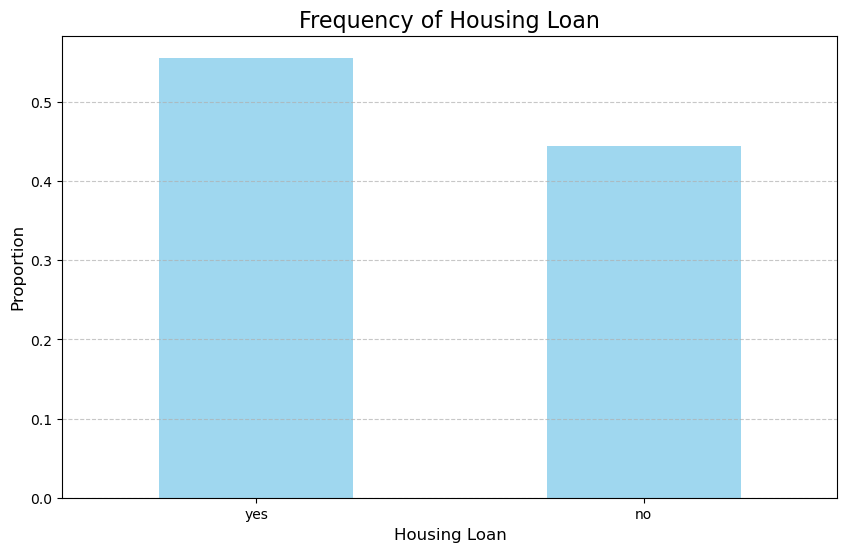

housing
yes    25130
no     20081
Name: count, dtype: int64


In [10]:
# Univariate analysis for 'housing'
plt.figure(figsize=(10, 6))
df['housing'].value_counts(normalize=True).plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Frequency of Housing Loan', fontsize=16)
plt.xlabel('Housing Loan', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Value counts for 'default'
print(df['housing'].value_counts())

The chart indicates that a slightly larger proportion of individuals in the dataset have **housing loans** ("yes") compared to those who do not ("no"). This suggests that housing loans are relatively common among the population, with over **50%** having loans. This balance indicates that while the majority have loans, there is still a substantial portion of individuals without them, which could be relevant for segmentation or financial analysis.

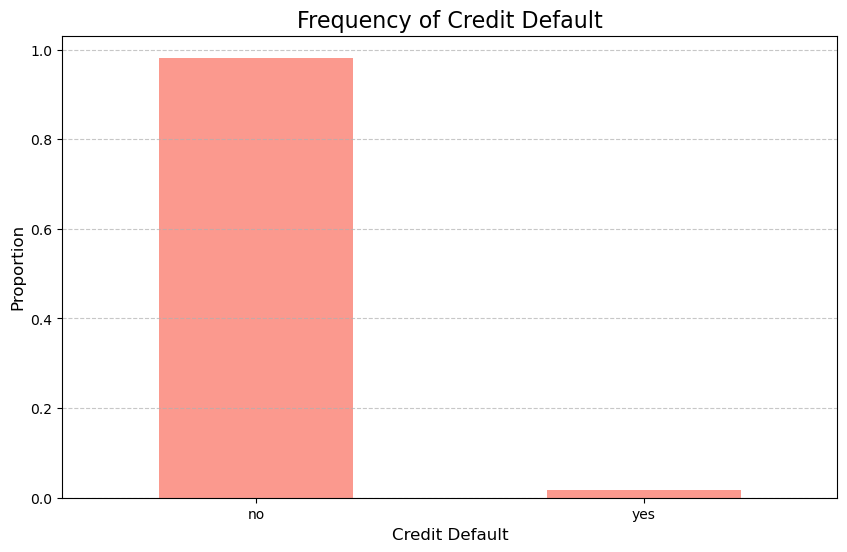

default
no     44396
yes      815
Name: count, dtype: int64


In [11]:
# Univariate analysis for 'default'
plt.figure(figsize=(10, 6))
df['default'].value_counts(normalize=True).plot(kind='bar', color='salmon', alpha=0.8)
plt.title('Frequency of Credit Default', fontsize=16)
plt.xlabel('Credit Default', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Value counts for 'default'
print(df['default'].value_counts())

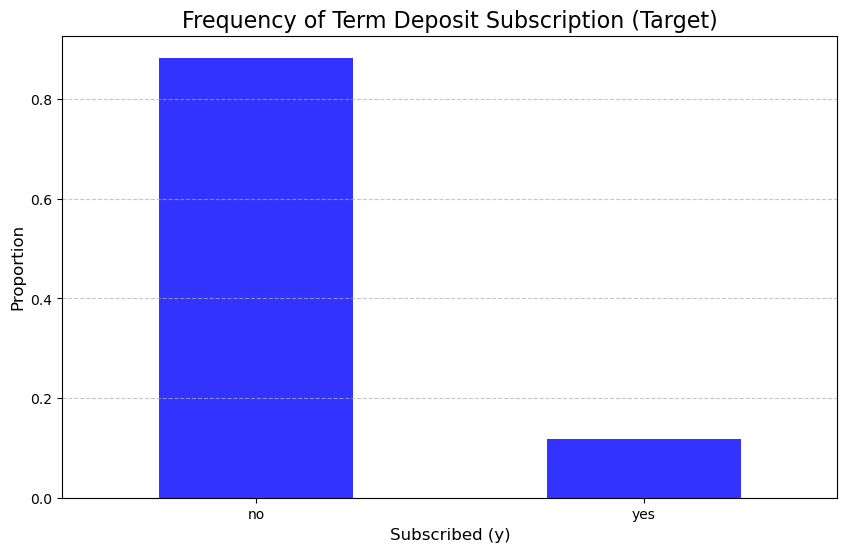

y
no     39922
yes     5289
Name: count, dtype: int64


In [12]:
# Univariate analysis for 'y'
plt.figure(figsize=(10, 6))
df['y'].value_counts(normalize=True).plot(kind='bar', color='blue', alpha=0.8)
plt.title('Frequency of Term Deposit Subscription (Target)', fontsize=16)
plt.xlabel('Subscribed (y)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Value counts for 'y'
print(df['y'].value_counts())


Biva

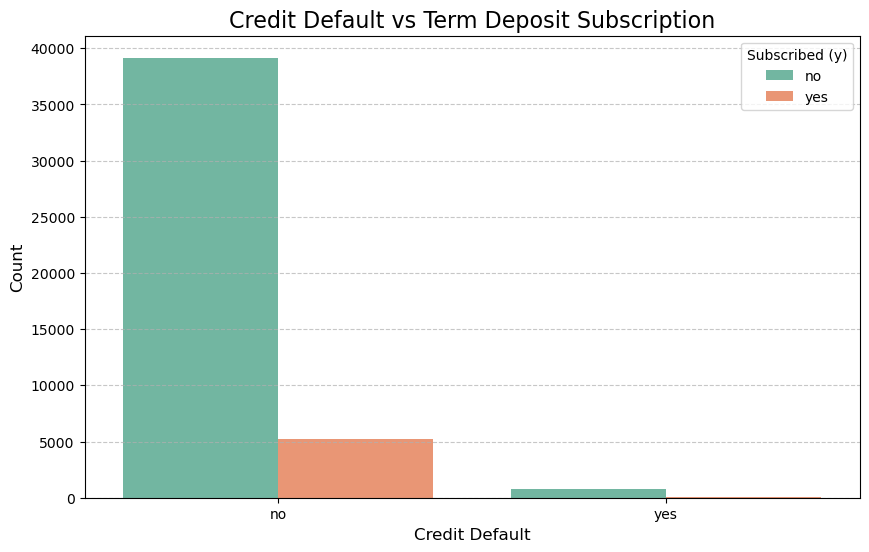

In [13]:
# Bivariate analysis: default vs y
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default', hue='y', palette='Set2')
plt.title('Credit Default vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Credit Default', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed (y)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



The chart shows the relationship between **credit default status** and **term deposit subscription**:

1. **Key Insight**:
   - Most individuals who **do not have a credit default** ("no") have also **not subscribed** to the term deposit, but there is a notable portion who have subscribed.
   - Among those with a **credit default** ("yes"), almost no one has subscribed to the term deposit.

2. **Implications**:
   - Credit default status appears to have a strong influence on term deposit subscriptions, with defaults being associated with almost no subscriptions.
   - The majority of term deposit subscribers are individuals without credit defaults.

3. **Potential Action**:
   - Financial institutions could use this insight to tailor marketing campaigns or risk assessments, focusing more on individuals without credit defaults for term deposit promotions.

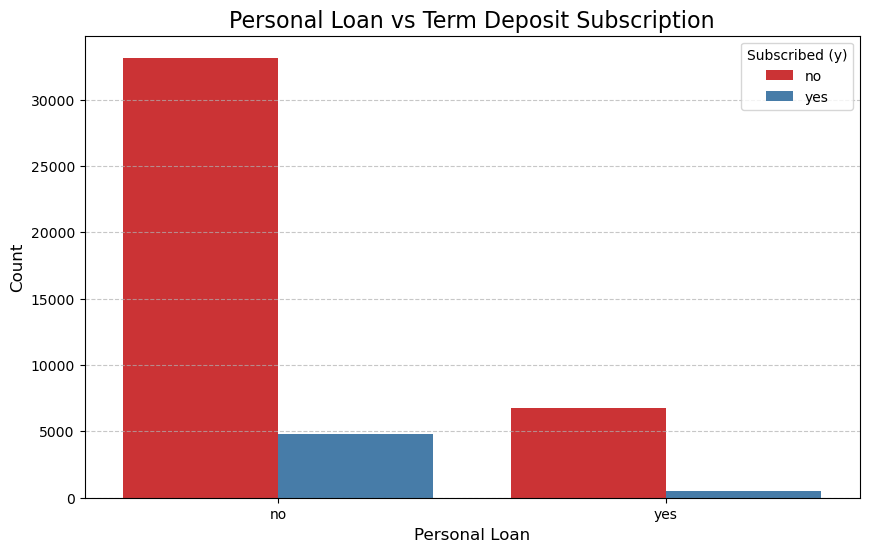

In [14]:
# Bivariate analysis: loan vs y
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan', hue='y', palette='Set1')
plt.title('Personal Loan vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Personal Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed (y)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




This chart explores the relationship between **personal loan status** and **term deposit subscription**:

1. **Key Insight**:
   - The majority of individuals who **do not have a personal loan** ("no") have also **not subscribed** to the term deposit, but a small portion of them have subscribed.
   - Among individuals who **have a personal loan** ("yes"), most have **not subscribed** to the term deposit, with very few having subscribed.

2. **Comparison**:
   - Term deposit subscriptions are more common among those without personal loans compared to those with personal loans.
   - Having a personal loan seems to be associated with a lower likelihood of subscribing to a term deposit.

3. **Implications**:
   - This suggests that individuals without personal loans may have more financial flexibility or savings capacity, making them more likely to subscribe to term deposits.
   - Financial institutions might focus deposit promotions on customers without existing personal loans to maximize subscription rates.

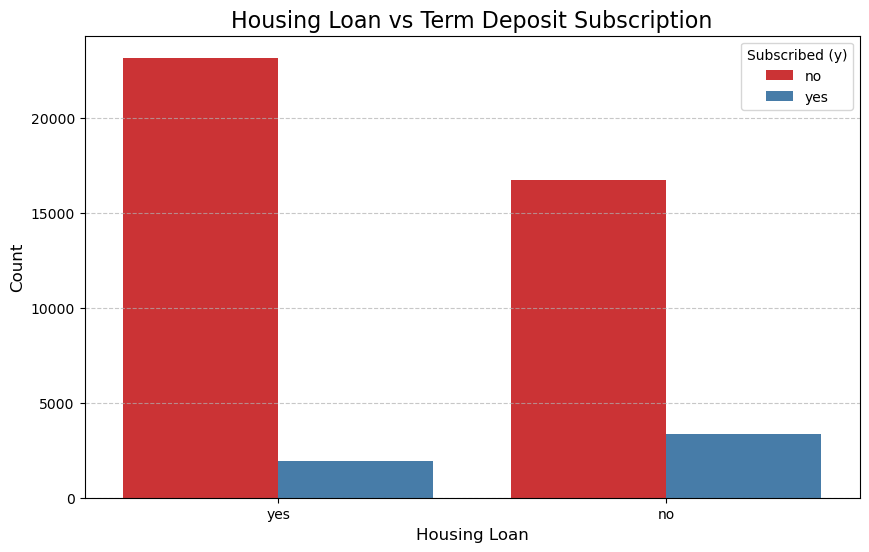

In [15]:
# Bivariate analysis: housing vs y
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='housing', hue='y', palette='Set1')
plt.title('Housing Loan vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Housing Loan', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed (y)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




This chart examines the relationship between **housing loan status** and **term deposit subscription**:

1. **Key Insight**:
   - Among individuals with a **housing loan** ("yes"), the majority have **not subscribed** to the term deposit, with only a small fraction subscribing.
   - For those **without a housing loan** ("no"), while most have also **not subscribed**, the proportion of subscribers is noticeably higher compared to those with housing loans.

2. **Comparison**:
   - Individuals without housing loans are more likely to subscribe to term deposits compared to those with housing loans.
   - Having a housing loan may reduce financial flexibility, impacting the likelihood of term deposit subscriptions.

3. **Implications**:
   - Financial institutions may find better opportunities for promoting term deposits among individuals without housing loans.
   - This insight suggests that housing loans might be an indicator of financial constraints or priorities that make term deposit subscriptions less appealing.

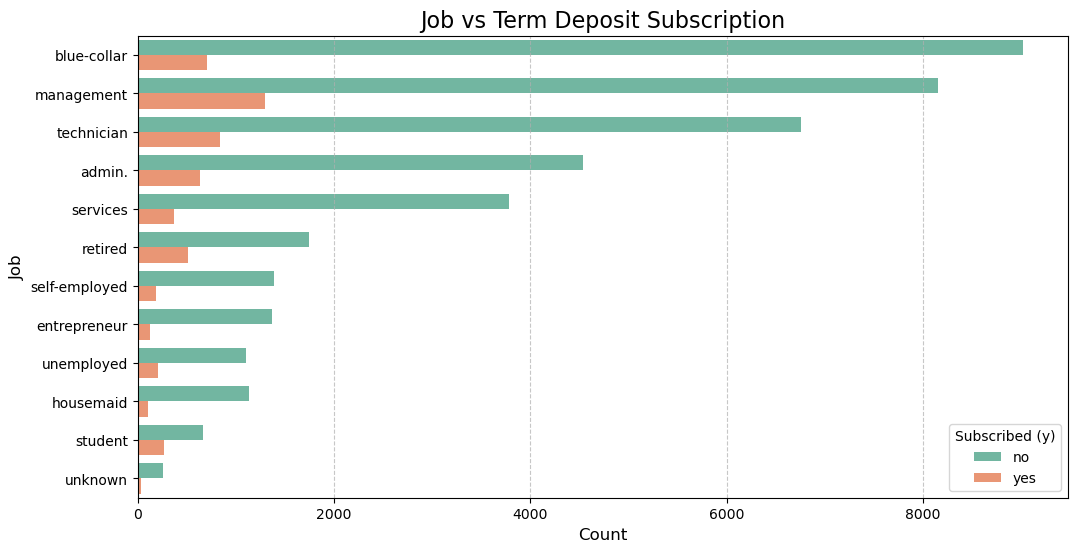

In [16]:
# Bivariate analysis: job vs y
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='job', hue='y', palette='Set2', order=df['job'].value_counts().index)
plt.title('Job vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.legend(title='Subscribed (y)', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()




This chart highlights the relationship between **job types** and **term deposit subscriptions**:

1. **Key Insights**:
   - **Blue-collar, management, and technician roles** have the highest counts of individuals, but a significantly larger proportion in these roles have **not subscribed** to term deposits compared to those who have.
   - **Retired individuals** have a higher relative proportion of subscriptions compared to other job categories, indicating they are more likely to subscribe despite their smaller absolute numbers.
   - Job types like **students, housemaids, and the unemployed** have lower absolute counts, with most individuals in these categories not subscribing to term deposits.

2. **Notable Trends**:
   - Subscriptions are generally less frequent across all job categories, except for retired individuals, who stand out with a higher relative subscription rate.
   - Blue-collar workers dominate in absolute count but have very low subscription rates, suggesting financial priorities or constraints in this group.

3. **Implications**:
   - Job type appears to influence term deposit subscriptions, with roles such as **retired** being more inclined to subscribe.
   - Financial institutions might consider tailoring their term deposit offers and marketing strategies to specific job categories, such as retirees, while addressing barriers for groups like blue-collar workers and technicians.

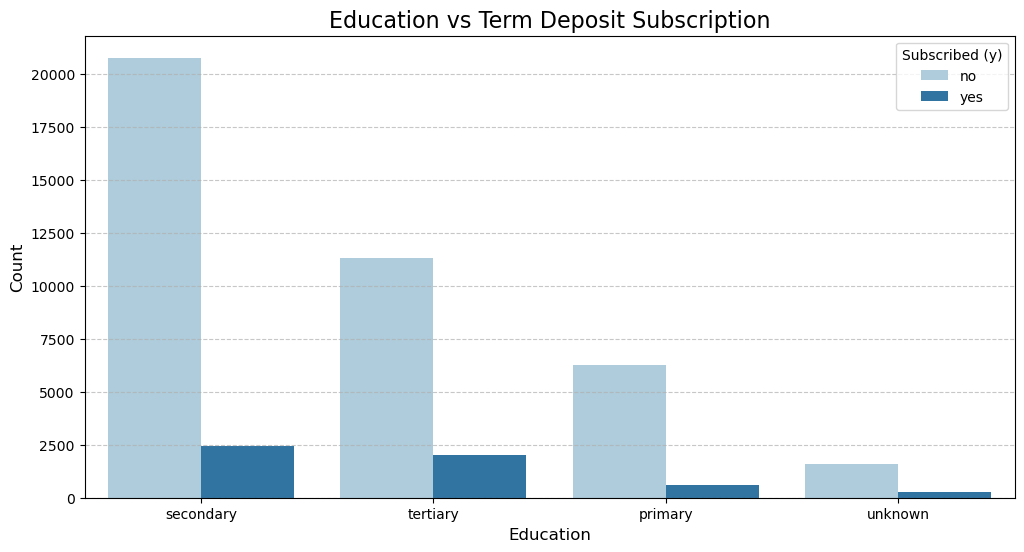

In [17]:
# Bivariate analysis: education vs y
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='y', palette='Paired', order=df['education'].value_counts().index)
plt.title('Education vs Term Deposit Subscription', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Subscribed (y)', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




This chart illustrates the relationship between **education levels** and **term deposit subscriptions**:

1. **Key Insights**:
   - Individuals with **secondary education** dominate in numbers, but the majority have **not subscribed** to term deposits. A small proportion within this group has subscribed.
   - Those with **tertiary education** have a higher relative proportion of subscriptions compared to other education levels, indicating that higher education levels may correlate with a greater likelihood of subscribing.
   - Individuals with **primary education** and **unknown education levels** show low subscription rates, with most not subscribing.

2. **Notable Trends**:
   - The likelihood of subscription seems to increase with higher education levels, particularly for tertiary education.
   - Secondary education accounts for the largest absolute number of subscriptions, though the relative subscription rate is lower.

3. **Implications**:
   - Education level plays a role in term deposit subscription behavior, with tertiary-educated individuals being a key target group for financial institutions.
   - Strategies to increase subscriptions among individuals with secondary or primary education might involve financial literacy campaigns or tailored products addressing barriers for these groups.

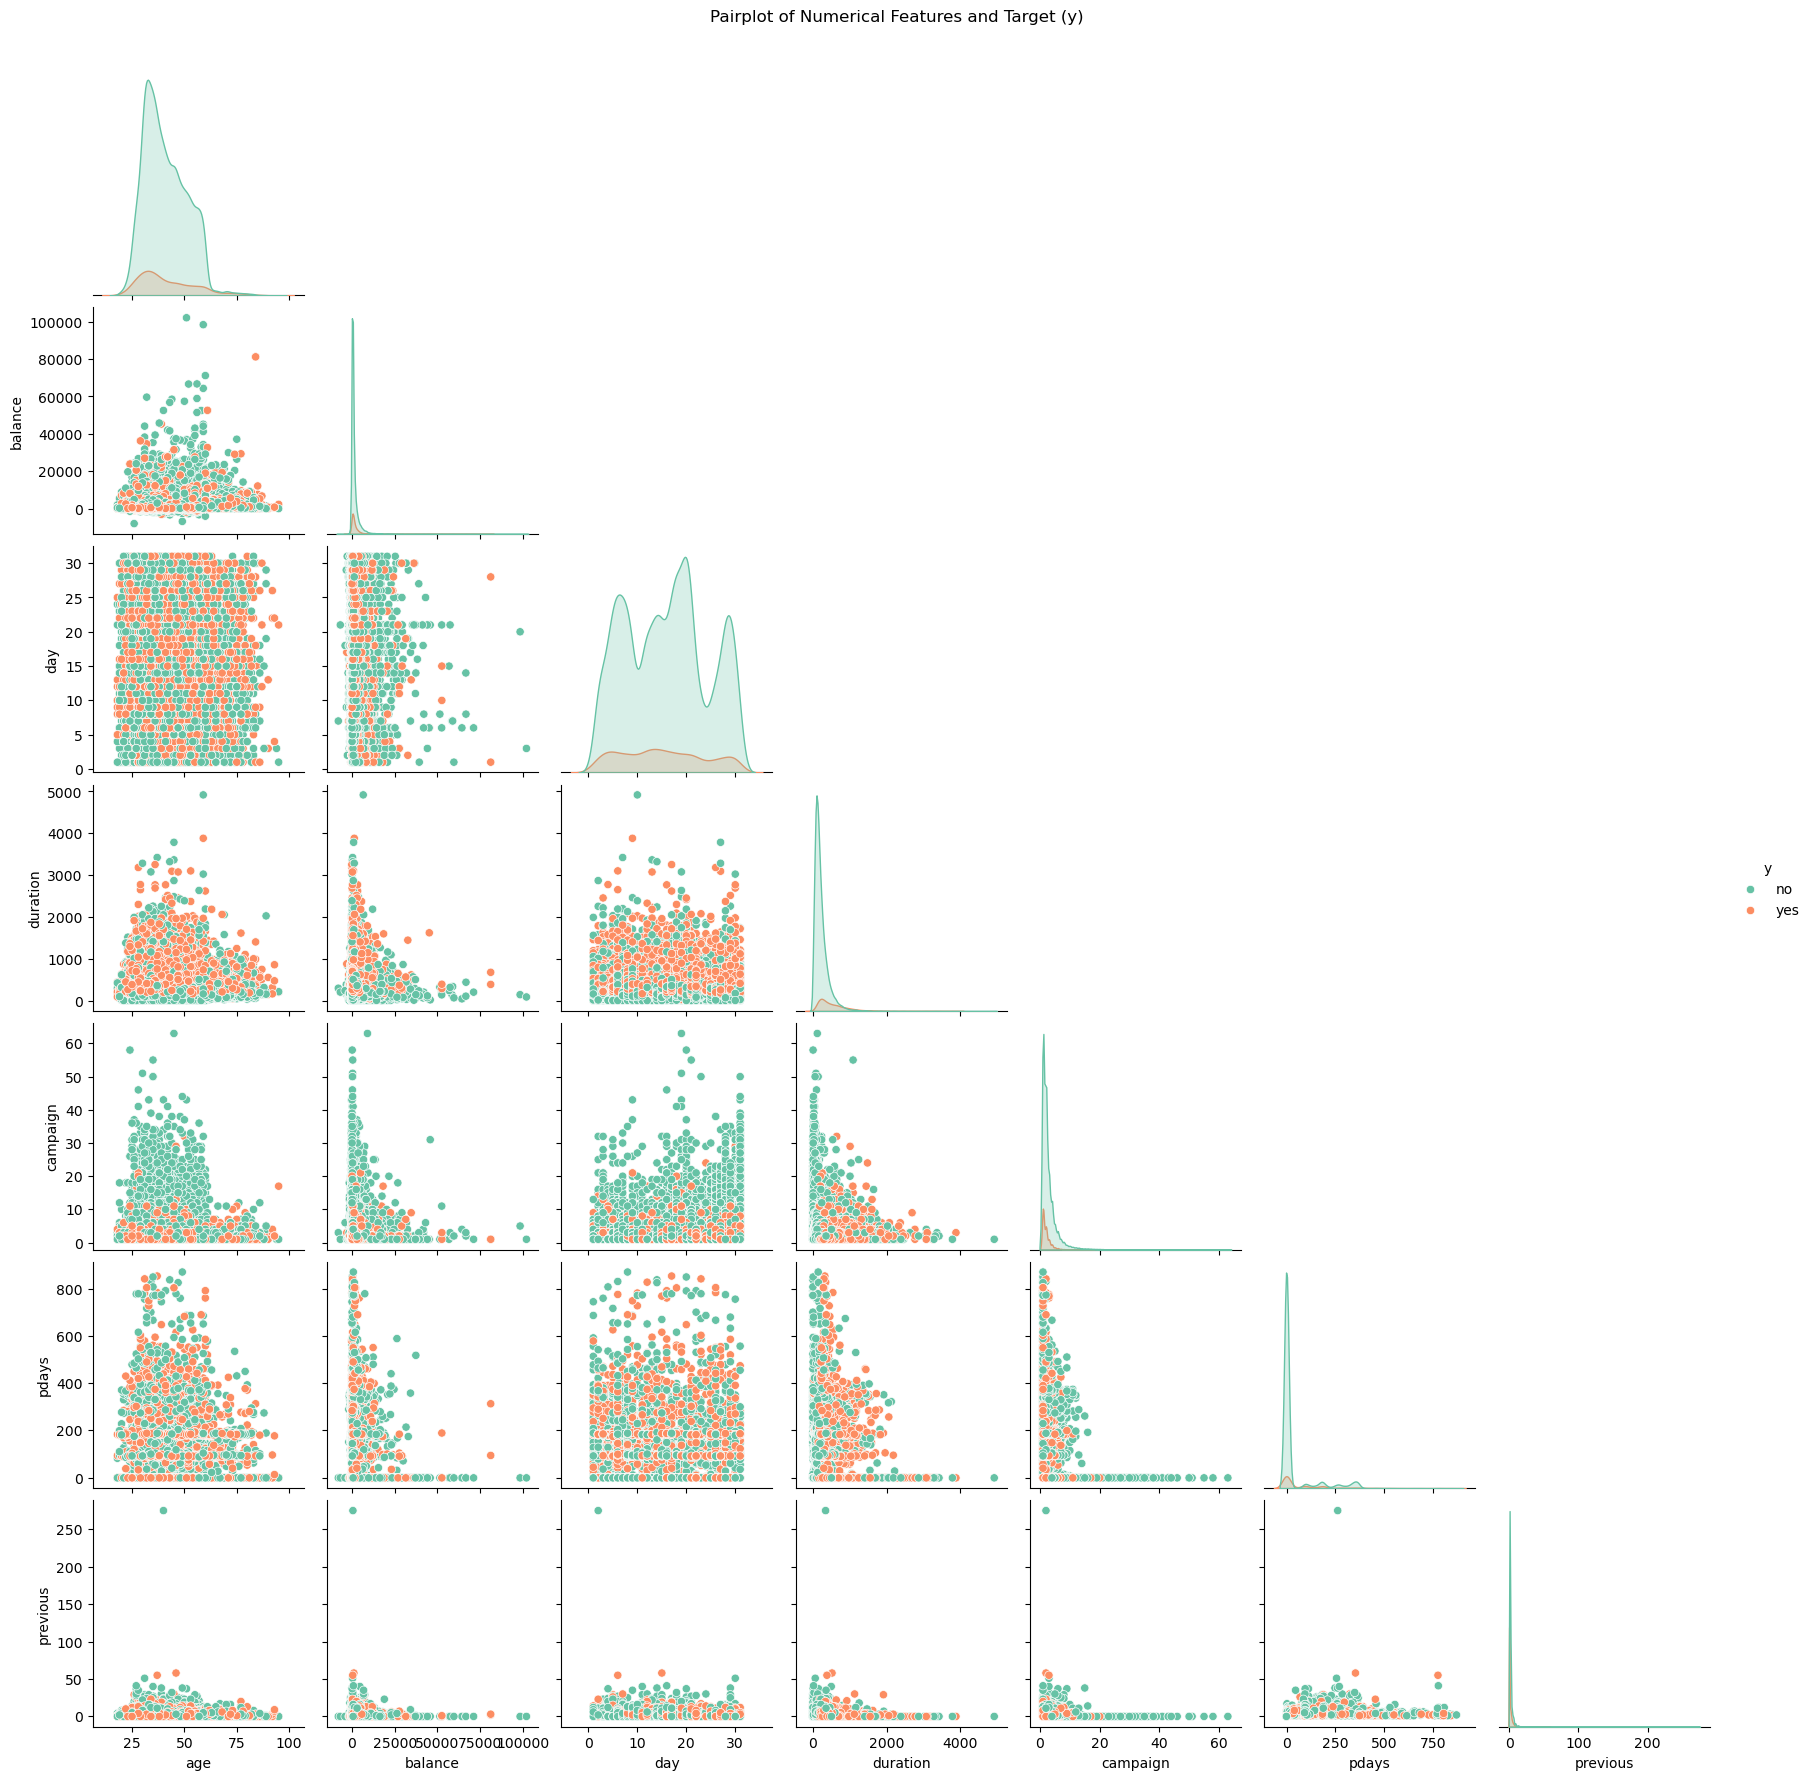

In [18]:
# Pairplot for numerical features and the target variable 'y'
sns.pairplot(df, hue='y', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pairplot of Numerical Features and Target (y)', y=1.02)
plt.show()


This pair plot provides a visual representation of the relationships between various **numerical features** in the dataset and their correlation with the target variable (`y`), classified into **"yes" (subscribed)** and **"no" (not subscribed)**. Here are the insights:

1. **Duration vs Target**:
   - The feature **duration** strongly distinguishes between "yes" and "no". Longer durations are highly associated with "yes" (subscribed), while shorter durations correlate with "no" (not subscribed). This indicates that the length of the interaction may play a critical role in determining subscription.

2. **Balance vs Target**:
   - The feature **balance** shows that higher balances tend to have more "yes" subscriptions, although the majority of points (for both "yes" and "no") are concentrated around lower balance values.

3. **Campaign and Previous Contacts**:
   - The number of contacts in the **campaign** and the number of **previous interactions** show minimal separation between "yes" and "no". This suggests these features may have less predictive power compared to others like duration.

4. **Age Distribution**:
   - Subscriptions ("yes") occur across a wide range of ages, but there does not seem to be a clear linear trend with the target variable.

5. **Day and Pdays**:
   - **Day** (of the last contact) and **pdays** (days since last contact) do not show strong patterns distinguishing between "yes" and "no". These features may not be highly influential on the outcome.

6. **Feature Relationships**:
   - Features such as **balance** and **duration** exhibit interesting relationships that align with the target variable, while others like **campaign** show a broader scatter with less distinction.


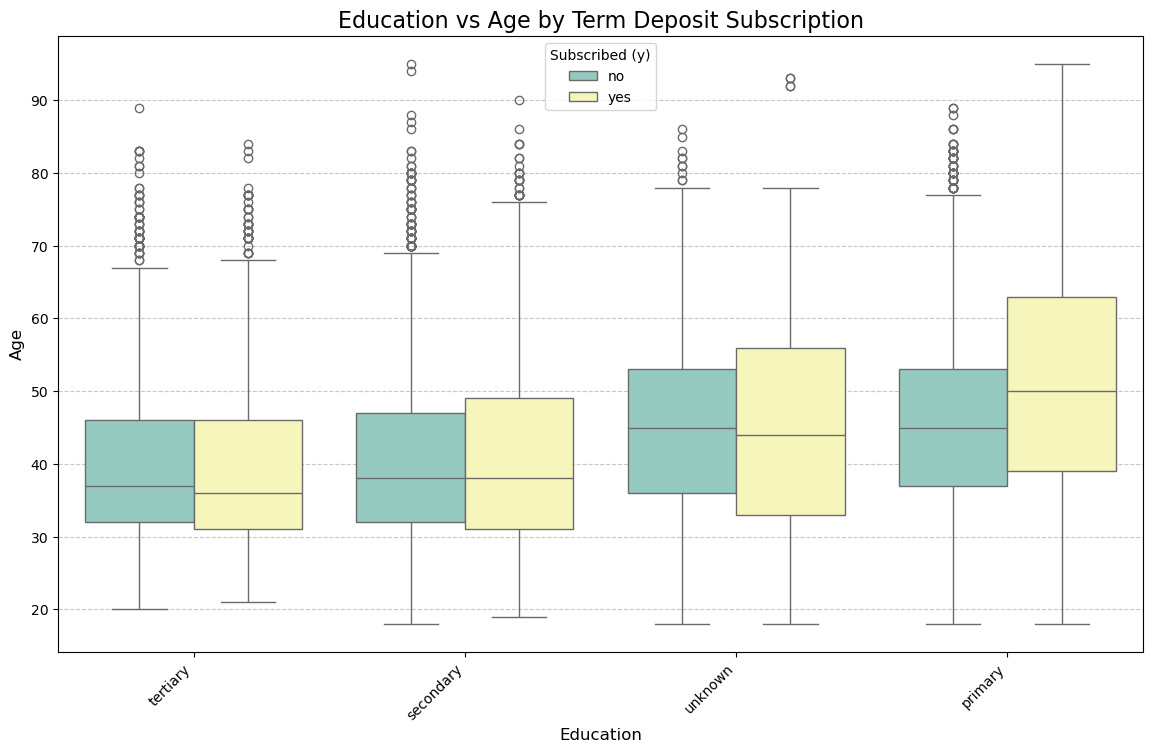

In [19]:
# Multivariate boxplot: education, job, and target
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='education', y='age', hue='y', palette='Set3')
plt.title('Education vs Age by Term Deposit Subscription', fontsize=16)
plt.xlabel('Education', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Subscribed (y)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This boxplot illustrates the relationship between **education level**, **age**, and **term deposit subscription** (`y`).

### Key Insights:
1. **Age Distribution by Education**:
   - Across all education levels, the age distribution for both subscribers (`yes`) and non-subscribers (`no`) shows a wide range, with the median age falling around **40-50 years**.
   - **Tertiary education** has the most balanced distribution of ages, with a slightly younger median for subscribers compared to non-subscribers.

2. **Subscribers (`yes`) by Education**:
   - For **primary education**, subscribers (`yes`) tend to be older compared to non-subscribers, indicating a potential correlation between age and likelihood of subscription within this group.
   - For **secondary and tertiary education**, the age distribution is more consistent, suggesting that education may play a stronger role than age in determining subscriptions.

3. **Unknown Education**:
   - Individuals with unknown education levels display a similar trend to other categories, but the overall sample size appears smaller, limiting conclusions about this group.

4. **Outliers**:
   - Outliers are present across all education levels, especially for older ages, which indicates that some individuals may not follow the general trends (e.g., younger individuals subscribing in primary education).

### Implications:
- **Education and Age Combination**:
  - The likelihood of subscription may increase with age for individuals with lower education levels, while for higher education levels, the effect of age appears less pronounced.
- **Targeting Strategies**:
  - Financial institutions could use this information to refine their marketing strategies, focusing on older individuals with primary education and younger individuals with tertiary education for term deposit promotions.

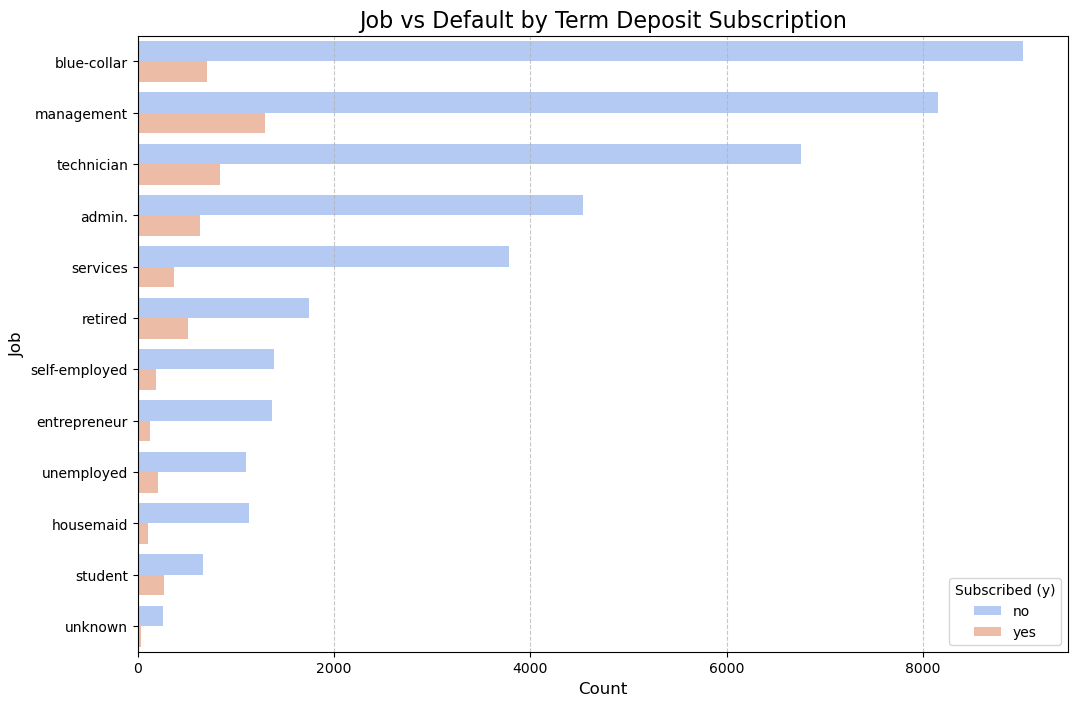

In [20]:
# Countplot for job, default, and target
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='job', hue='y', palette='coolwarm', order=df['job'].value_counts().index)
plt.title('Job vs Default by Term Deposit Subscription', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.legend(title='Subscribed (y)', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Feature engineering 

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the data to avoid overwriting the original dataset
data_encoded = df.copy()

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to all categorical columns
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# Display the first few rows of the label-encoded DataFrame
data_encoded.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [22]:
# Compute the correlation
correlation_matrix = data_encoded.corr()

correlation_matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


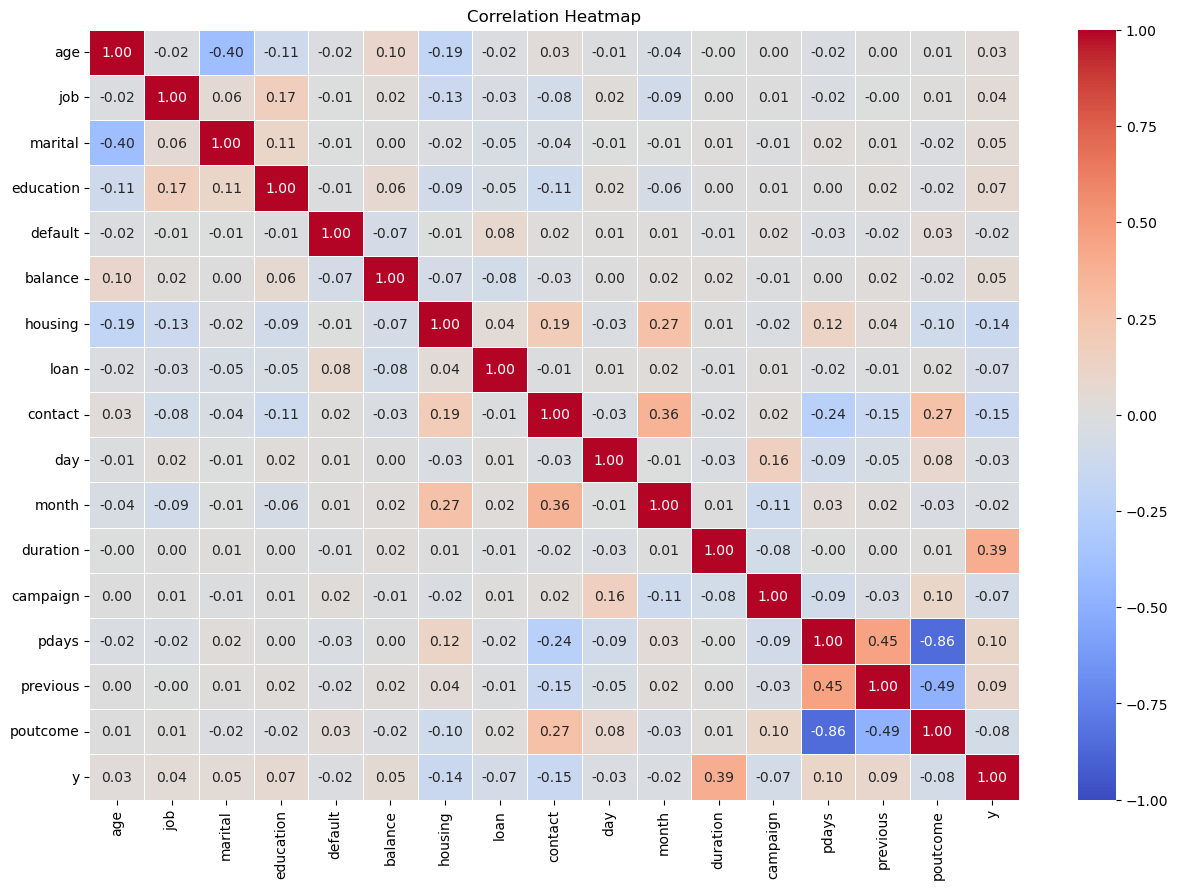

In [23]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
correlation_with_target = correlation_matrix['y'].sort_values(ascending=False)
correlation_with_target

y            1.000000
duration     0.394521
pdays        0.103621
previous     0.093236
education    0.066241
balance      0.052838
marital      0.045588
job          0.040438
age          0.025155
default     -0.022419
month       -0.024471
day         -0.028348
loan        -0.068185
campaign    -0.073172
poutcome    -0.077840
housing     -0.139173
contact     -0.148395
Name: y, dtype: float64

The correlation values provided represent the **strength and direction** of the relationship between the features and the target variable (`y`), which is likely the term deposit subscription (1 for subscribed and 0 for not subscribed). Here's the key analysis:

### **Positive Correlations**:
- **Duration** (0.394521): This feature has the strongest positive correlation with the target, indicating that longer contact durations significantly increase the likelihood of subscription. This is a critical feature for the model.
- **Pdays** (0.103621) and **Previous** (0.093236): These features, related to previous campaign contacts, have a small positive correlation, suggesting some influence on subscriptions but not as strong as duration.
- **Education** (0.066241) and **Balance** (0.052838): Higher education levels and balances slightly increase the likelihood of subscription.
- **Marital** (0.045588) and **Job** (0.040438): These demographic factors have a minor positive relationship, indicating limited predictive power.
- **Age** (0.025155): Age shows a weak positive correlation, suggesting it has little influence on subscription decisions.

### **Negative Correlations**:
- **Housing Loan** (-0.139173): Having a housing loan is moderately negatively correlated with subscriptions, indicating that financial commitments may reduce the likelihood of subscribing.
- **Contact Type** (-0.148395): Certain contact methods are negatively associated with subscriptions, possibly reflecting less effective outreach methods.
- **Poutcome** (-0.077840): The outcome of previous campaigns has a small negative impact, possibly indicating unsuccessful past interactions.
- **Campaign** (-0.073172): A higher number of campaign contacts correlates negatively, suggesting diminishing returns from repeated contacts.
- **Loan** (-0.068185): Having other loans slightly reduces subscription likelihood.
- **Default** (-0.022419): Defaulting on credit has a negligible negative correlation.

### **Minimal or Insignificant Correlations**:
- **Month** (-0.024471) and **Day** (-0.028348): These temporal features have almost no meaningful correlation with the target variable, suggesting they may not be predictive.

### **Insights**:
- **Duration** is the most critical feature and should be prioritized in predictive modeling.
- Financial and campaign-related features like **balance**, **pdays**, and **previous** have some influence but are weaker compared to duration.
- Negative correlations highlight potential barriers to subscription, such as financial commitments (housing loans, other loans).
- Demographic factors like **education** and **job** have minor effects and could provide additional context in a model. 


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Prepare data by dropping the target variable
X = data_encoded.drop(columns=['y'])  # Drop the target column

# Add a constant for the VIF calculation
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant column's VIF as it's not meaningful
vif_data = vif_data[vif_data['Feature'] != 'const']

# Display VIF values
vif_data


,Feature,VIF
1,age,1.279310
2,job,1.049332
3,marital,1.218279
4,education,1.066491
5,default,1.011706
6,balance,1.032463
7,housing,1.190106
8,loan,1.020907
9,contact,1.319594
10,day,1.039638


In [29]:
from sklearn.utils import resample
import pandas as pd

# Assuming 'data' is your DataFrame
target_column = 'y'  
X = data_encoded.drop(columns=[target_column])
y = data_encoded[target_column]

# Combine features and target
data_combined = pd.concat([X, y], axis=1)

# Separate the classes
majority_class = data_combined[data_combined[target_column] == 0]
minority_class = data_combined[data_combined[target_column] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combine the majority and upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

# Split back into features and target
X_upsampled = data_upsampled.drop(columns=[target_column])
y_upsampled = data_upsampled[target_column]

# Print class distribution
print("Class distribution after upsampling:")
print(y_upsampled.value_counts())


Class distribution after upsampling:
y
0    39922
1    39922
Name: count, dtype: int64


Modeling 

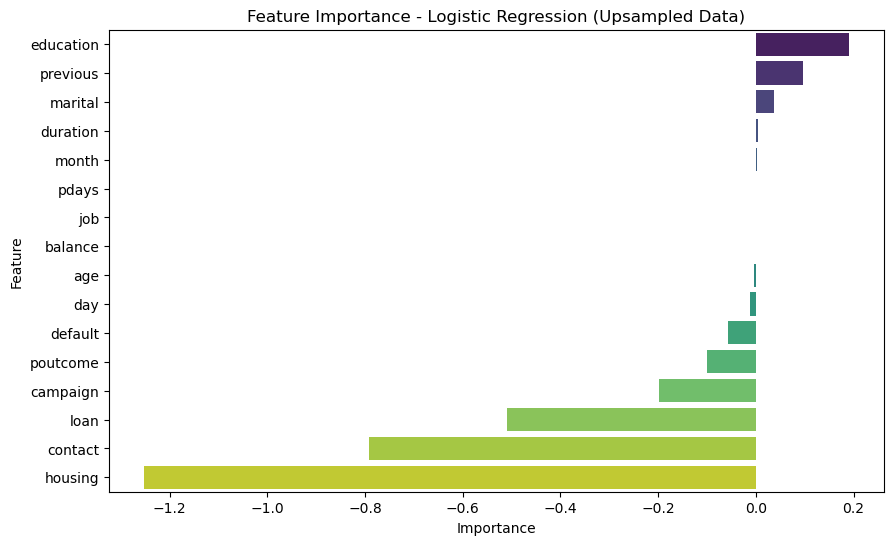


Logistic Regression Metrics (Upsampled Data):
AUC: 0.87
F1 Score: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80     11977
           1       0.79      0.80      0.80     11977

    accuracy                           0.80     23954
   macro avg       0.80      0.80      0.80     23954
weighted avg       0.80      0.80      0.80     23954



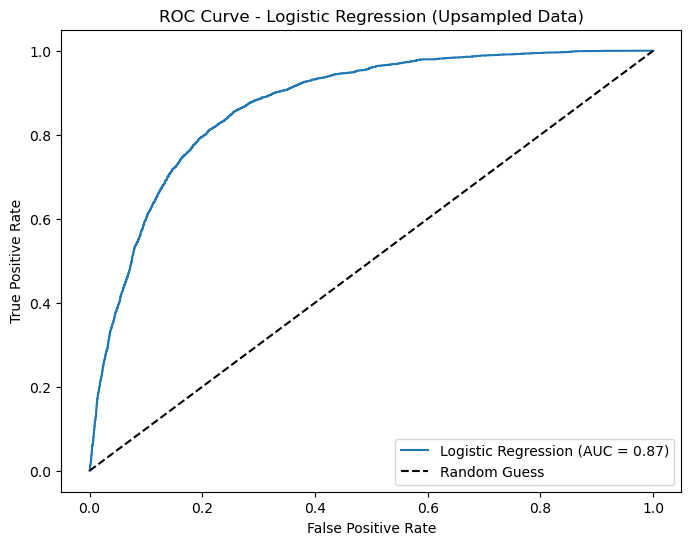

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split after upsampling
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.3, random_state=42, stratify=y_upsampled)

# ==========================
# Logistic Regression
# ==========================
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and Probabilities
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Feature Importance
log_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg.coef_[0]
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=log_feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Logistic Regression (Upsampled Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Metrics
auc_lr = roc_auc_score(y_test, y_proba_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("\nLogistic Regression Metrics (Upsampled Data):")
print(f"AUC: {auc_lr:.2f}")
print(f"F1 Score: {f1_lr:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Upsampled Data)')
plt.legend()
plt.show()



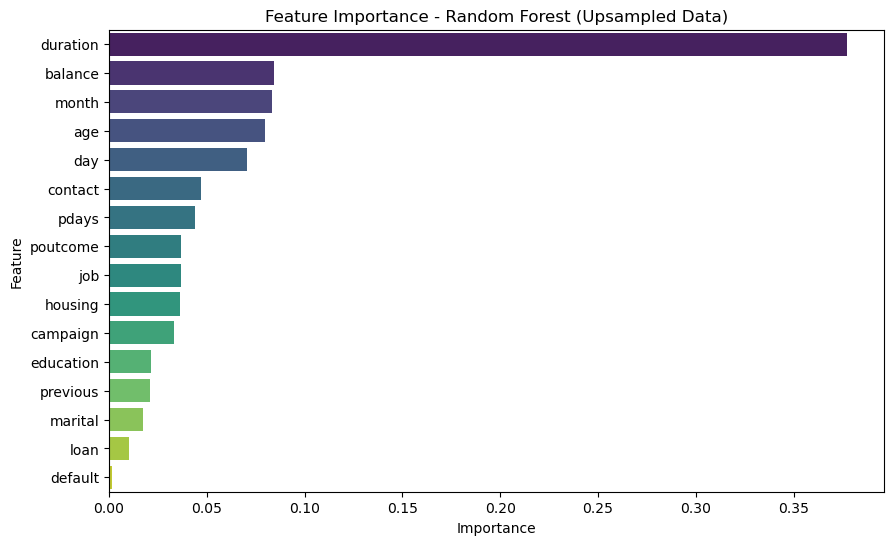


Random Forest Metrics (Upsampled Data):
AUC: 1.00
F1 Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11977
           1       0.94      1.00      0.97     11977

    accuracy                           0.97     23954
   macro avg       0.97      0.97      0.97     23954
weighted avg       0.97      0.97      0.97     23954



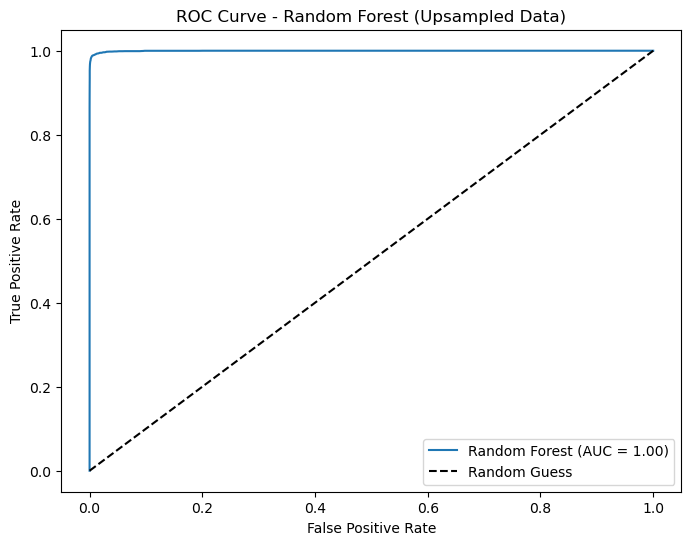

In [31]:
# ==========================
# Random Forest
# ==========================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and Probabilities
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest (Upsampled Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Metrics
auc_rf = roc_auc_score(y_test, y_proba_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print("\nRandom Forest Metrics (Upsampled Data):")
print(f"AUC: {auc_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Upsampled Data)')
plt.legend()
plt.show()



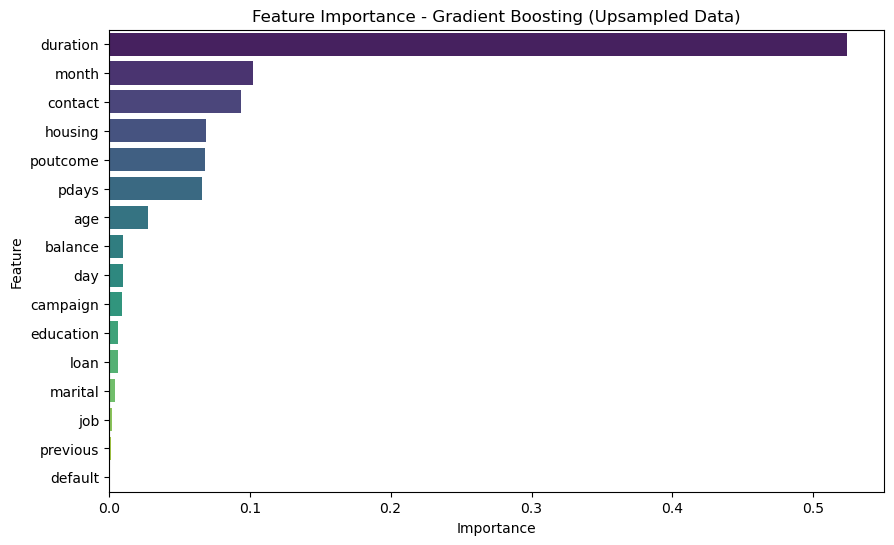


Gradient Boosting Metrics (Upsampled Data):
AUC: 0.93
F1 Score: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86     11977
           1       0.84      0.90      0.87     11977

    accuracy                           0.86     23954
   macro avg       0.86      0.86      0.86     23954
weighted avg       0.86      0.86      0.86     23954



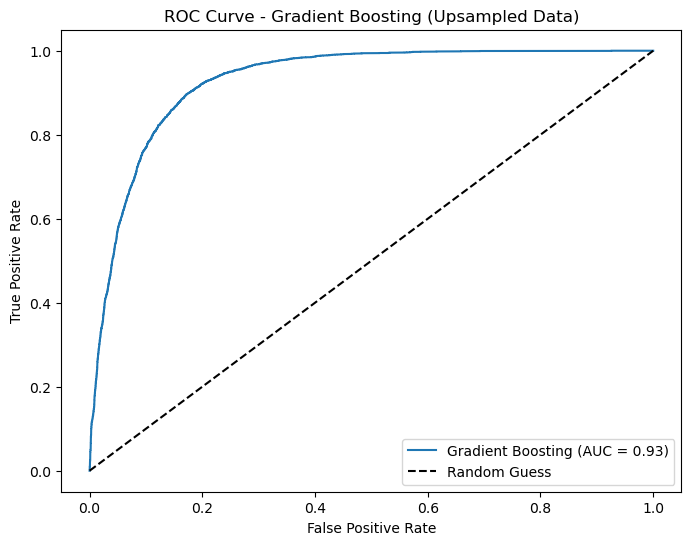

In [32]:
# ==========================
# Gradient Boosting
# ==========================
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predictions and Probabilities
y_pred_gb = gb.predict(X_test)
y_proba_gb = gb.predict_proba(X_test)[:, 1]

# Feature Importance
gb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=gb_feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Gradient Boosting (Upsampled Data)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Metrics
auc_gb = roc_auc_score(y_test, y_proba_gb)
f1_gb = f1_score(y_test, y_pred_gb)
print("\nGradient Boosting Metrics (Upsampled Data):")
print(f"AUC: {auc_gb:.2f}")
print(f"F1 Score: {f1_gb:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting (Upsampled Data)')
plt.legend()
plt.show()






Lasso Logistic Regression Metrics (Upsampled Data):
AUC: 0.88
F1 Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81     11977
           1       0.81      0.80      0.81     11977

    accuracy                           0.81     23954
   macro avg       0.81      0.81      0.81     23954
weighted avg       0.81      0.81      0.81     23954



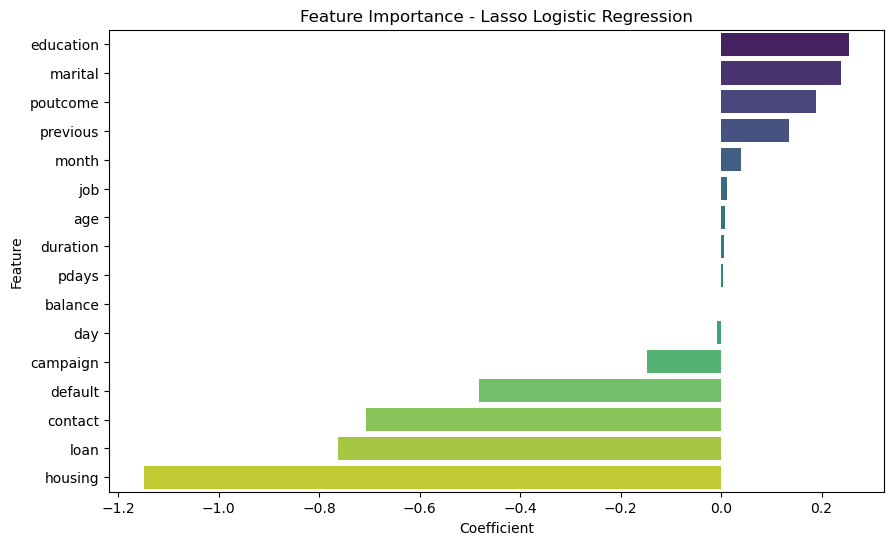

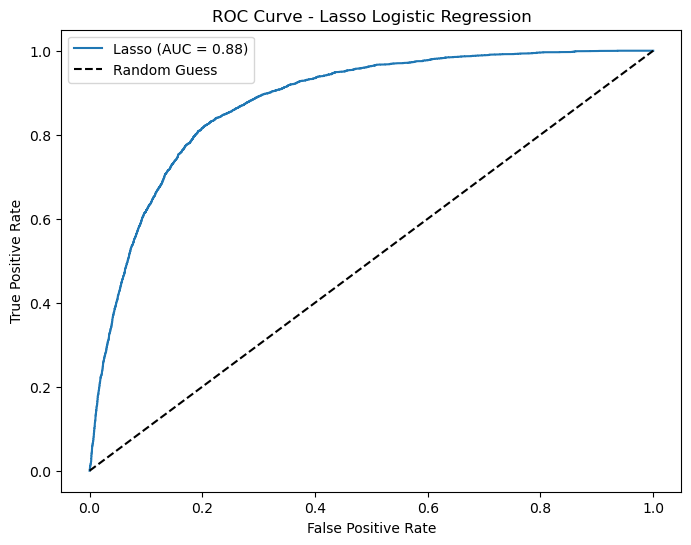

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, classification_report, roc_curve

# ==========================
# Lasso Logistic Regression
# ==========================
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso.fit(X_train, y_train)

# Predictions and Probabilities
y_pred_lasso = lasso.predict(X_test)
y_proba_lasso = lasso.predict_proba(X_test)[:, 1]

# Metrics
auc_lasso = roc_auc_score(y_test, y_proba_lasso)
f1_lasso = f1_score(y_test, y_pred_lasso)
print("\nLasso Logistic Regression Metrics (Upsampled Data):")
print(f"AUC: {auc_lasso:.2f}")
print(f"F1 Score: {f1_lasso:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lasso))

# Feature Importance
lasso_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=lasso_feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance - Lasso Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# ROC Curve
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_proba_lasso)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso (AUC = {auc_lasso:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Lasso Logistic Regression')
plt.legend()
plt.show()



Confusion Matrix - Logistic Regression (Upsampled Data):


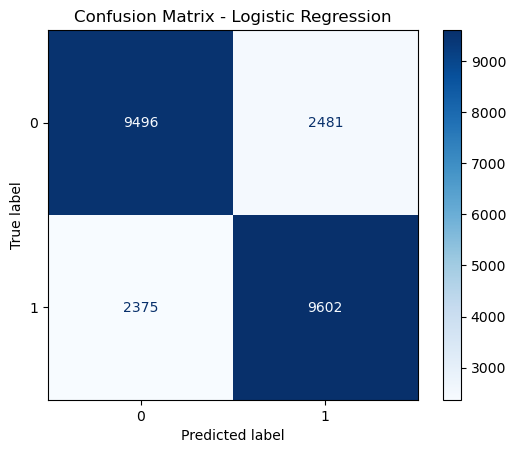


Confusion Matrix - Random Forest (Upsampled Data):


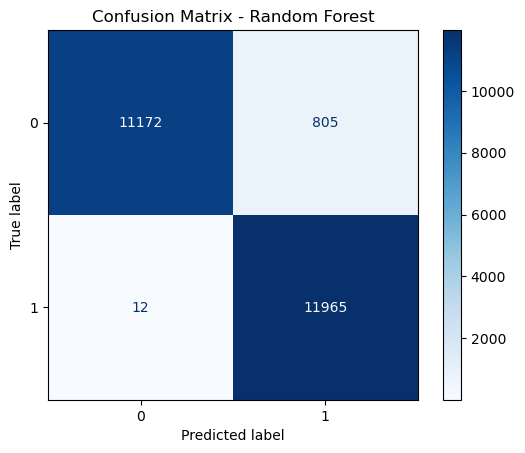


Confusion Matrix - Gradient Boosting (Upsampled Data):


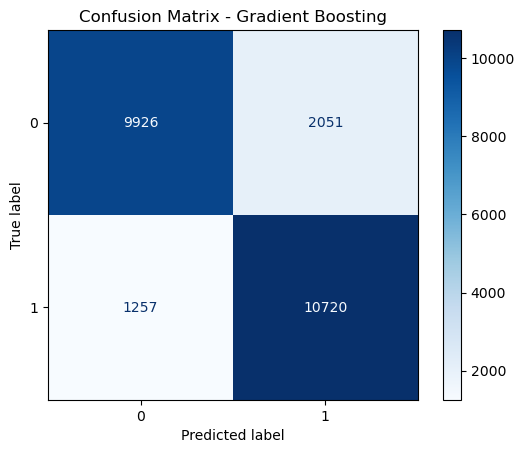


Confusion Matrix - Lasso Logistic Regression (Upsampled Data):


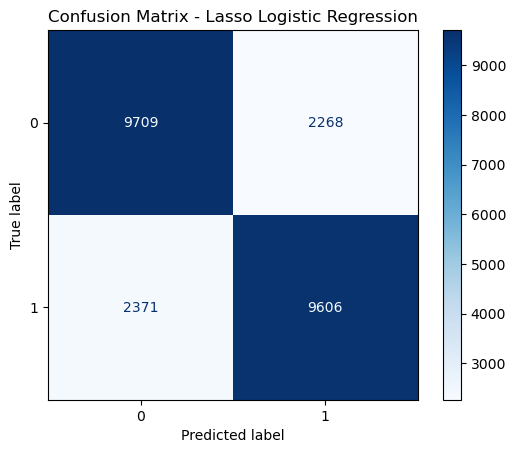

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# ==========================
# Logistic Regression
# ==========================
print("\nConfusion Matrix - Logistic Regression (Upsampled Data):")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# ==========================
# Random Forest
# ==========================
print("\nConfusion Matrix - Random Forest (Upsampled Data):")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# ==========================
# Gradient Boosting
# ==========================
print("\nConfusion Matrix - Gradient Boosting (Upsampled Data):")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting")


# ==========================
# Lasso Logistic Regression
# ==========================
print("\nConfusion Matrix - Lasso Logistic Regression (Upsampled Data):")
plot_confusion_matrix(y_test, y_pred_lasso, "Lasso Logistic Regression")


In [40]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.95696905 0.95580605 0.95687958 0.96018966 0.9577742 ]
Mean CV Accuracy: 0.9575
Standard Deviation: 0.0015


In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform hyperparameter tuning
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best CV Accuracy: 0.9570406154947217


In [42]:
import pickle

# Get the best model
best_rf = random_search.best_estimator_

# Save the model to a file
with open('best_random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf, model_file)

print("Best Random Forest model saved as 'best_random_forest_model.pkl'")


Best Random Forest model saved as 'best_random_forest_model.pkl'


In [ ]:
# Load the model
with open('best_random_forest_model.pkl', 'rb') as model_file:
    loaded_rf = pickle.load(model_file)

# Predict using the loaded model
y_pred = loaded_rf.predict(X_test)
